# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi


%matplotlib inline

In [26]:
from MCForecastTools import MCSimulation

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
today = pd.Timestamp("2021-09-28", tz="America/New_York").isoformat()

In [8]:
timeframe = "1D"

In [9]:
btc_data = requests.get(btc_url).json()
btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18830012,
   'total_supply': 18830012,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 43162.0,
     'volume_24h': 31312093697,
     'market_cap': 811813814433,
     'percentage_change_1h': 0.235761537665954,
     'percentage_change_24h': 3.05811103981298,
     'percentage_change_7d': -0.97490976414494,
     'percent_change_1h': 0.235761537665954,
     'percent_change_24h': 3.05811103981298,
     'percent_change_7d': -0.97490976414494},
    'CAD': {'price': 55001.3366,
     'volume_24h': 39901000998.0871,
     'market_cap': 1034494343731.97,
     'percent_change_1h': 0.235761537665954,
     'percent_change_24h': 3.05811103981298,
     'percent_change_7d': -0.97490976414494}},
   'last_updated': 1632969581}},
 'metadata': {'timestamp': 1632969581,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [10]:
btc_price = btc_data['data']['1']['quotes']['USD']['price']
btc_price

43162.0

In [11]:
my_btc_value = btc_price * my_btc
my_btc_value

51794.4

In [12]:
eth_data = requests.get(eth_url).json()
eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 117730228,
   'total_supply': 117730228,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2980.35,
     'volume_24h': 18959141729,
     'market_cap': 350417737254,
     'percentage_change_1h': 0.296270651093275,
     'percentage_change_24h': 3.45202480016763,
     'percentage_change_7d': -3.0502687302819,
     'percent_change_1h': 0.296270651093275,
     'percent_change_24h': 3.45202480016763,
     'percent_change_7d': -3.0502687302819},
    'CAD': {'price': 3797.860005,
     'volume_24h': 24159634305.2647,
     'market_cap': 446537322582.772,
     'percent_change_1h': 0.296270651093275,
     'percent_change_24h': 3.45202480016763,
     'percent_change_7d': -3.0502687302819}},
   'last_updated': 1632969592}},
 'metadata': {'timestamp': 1632969592,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [13]:
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
eth_price

2980.35

In [14]:
my_eth_value = eth_price * my_eth
my_eth_value

15795.855

In [15]:
# Fetch current BTC price
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $51794.40
The current value of your 5.3 ETH is $15795.85


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [16]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [17]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [18]:
# Format current date as ISO format
today = pd.Timestamp("2021-07-28", tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Preview DataFrame
df_portfolio.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-07-28 00:00:00-04:00  116.24  116.49  116.14  116.48  5189696  439.68   

                                                            
                            high     low   close    volume  
time                                                        
2021-07-28 00:00:00-04:00  440.3  437.31  438.84  47642330

In [19]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.48
Current SPY closing price: $438.84


In [20]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21942.00
The current value of your 200 AGG shares is $23296.00


### Savings Health Analysis

In [21]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
shares_value = my_spy_value + my_agg_value

# Create savings DataFrame
data = {'amount':[crypto_value, shares_value]}
df_savings = pd.DataFrame(data, index =['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,67590.255
shares,45238.000


<AxesSubplot:title={'center':'composition of personal savings'}, ylabel='amount'>

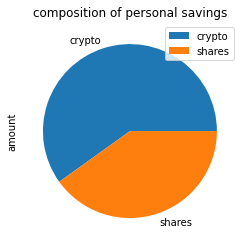

In [22]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="composition of personal savings")

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + shares_value

# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [27]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-28', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   
2017-10-10 00:00:00-04:00  109.47  109.61  109.3999  109.43  1502645.0   
2017-10-11 00:00:00-04:00  109.47  109.53  109.4200  109.47  1576528.0   
2017-10-12 00:00:00-04:00  109.56  109.61  109.4800  109.61  1797948.0   

                              SPY                                       
                             open    high      low   close      volume  
time                                                                    
2017-10-06 00:00:00-04:00     NaN     NaN      NaN     NaN         NaN  
2017-10-09 00:00:00-04:00  254.63  254.70  253.650  253.96  23554888.0  
2017-10-10 00:00:00-04:00  254.62  255.05  253.980  254.60  28248210.0  
2017-10-11 00:00:00-04:00  254.51  255.02  254.320  255.00  24704274.0  
2017-10-12 00:00:00-04:00  254.66  255.06  254.365  254.60  32195167.0

In [29]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [32]:
# Printing the simulation input data
MC_sim.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   
2017-10-10 00:00:00-04:00  109.47  109.61  109.3999  109.43  1502645.0   
2017-10-11 00:00:00-04:00  109.47  109.53  109.4200  109.47  1576528.0   
2017-10-12 00:00:00-04:00  109.56  109.61  109.4800  109.61  1797948.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-10-06 00:00:00-04:00          NaN     NaN     NaN      NaN     NaN   
2017-10-09 00:00:00-04:00     0.001006  254.63  254.70  253.650  253.96   
2017-10-10 00:00:00-04:00     0.000274  254.62  255.05  253.980  254.60   
2017-10-11 00:00:00-04:00     0.000366  254.51  255.02  254.320  255.00   
2017-10-12 00:00:00-04:00     0.001279  254.66  255.06  254.365  254.60   

                                                    
                               volume daily_return  
time                                                
2017-10-06 00:00:00-04:00         NaN          NaN  
2017-10-09 00:00:00-04:00  23554888.0          NaN  
2017-10-10 00:00:00-04:00  28248210.0     0.002520  
2017-10-11 00:00:00-04:00  24704274.0     0.001571  
2017-10-12 00:00:00-04:00  32195167.0    -0.001569

In [33]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993158,0.995934,0.991942,0.997772,1.009052,0.999171,1.005574,0.999753,0.978201,0.998608,...,0.989830,0.989023,0.990311,1.000321,0.995716,0.990334,0.995497,1.007492,0.990847,1.004698
2,0.982483,0.994717,0.984742,0.992489,1.018436,1.010246,1.004964,0.999979,0.974833,0.993516,...,0.991283,1.002535,0.994000,0.990249,0.996367,0.989093,1.006039,1.015946,0.995454,1.018562
3,0.975047,0.997549,0.971128,0.981496,1.020749,1.008499,1.006064,1.003460,0.983495,0.991000,...,0.996135,0.993437,0.989321,0.985759,0.986124,0.975531,0.991538,1.021959,0.991874,1.002040
4,0.969257,1.005673,0.966286,0.973475,1.026831,0.999054,1.001542,1.004106,0.975465,0.981869,...,0.996769,0.986563,0.987395,0.979424,0.991913,0.976171,0.998664,1.023409,0.986844,1.015258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,21.952793,21.501454,11.579663,19.993785,10.451494,10.147526,15.607945,15.303227,18.385376,8.856618,...,19.732840,6.177532,25.966032,13.046036,54.446917,27.440744,21.598468,19.883471,13.439261,47.319326
7557,21.668459,21.786316,11.650859,20.152804,10.575310,10.078821,15.821949,15.567695,18.199621,8.986775,...,19.686839,6.197291,25.663249,13.200633,55.031678,27.532104,21.726468,19.657902,13.434076,47.829565
7558,21.752065,21.542267,11.753156,20.061763,10.719774,10.054651,15.846462,15.481954,17.867139,8.922155,...,19.560173,6.186063,25.754813,13.345265,54.658785,27.497166,21.684918,19.431087,13.412435,47.778302
7559,21.619768,21.488078,11.881870,20.130857,10.678562,10.165622,15.810371,15.516714,17.750541,8.932558,...,19.451719,6.203029,25.522141,13.286807,54.198383,27.495643,21.672011,19.247457,13.538170,47.351039


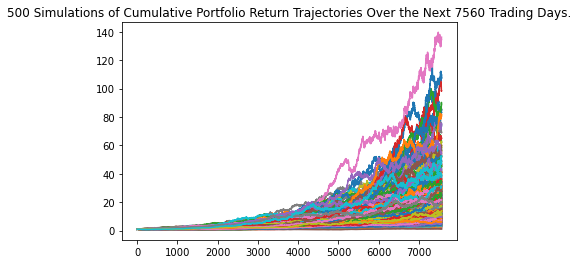

In [35]:
# Plot simulation outcomes
mc_plot = MC_sim.plot_simulation()

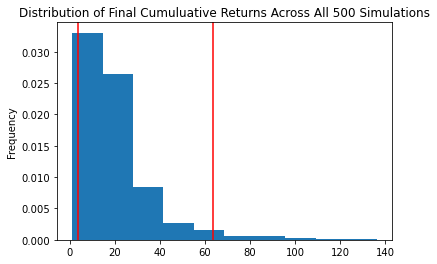

In [36]:
# Plot probability distribution and confidence intervals
mc_dist_plot = MC_sim.plot_distribution()

### Retirement Analysis

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_summary = MC_sim.summarize_cumulative_return()

# Print summary statistics
print(mc_summary)

count           500.000000
mean             20.373856
std              16.695673
min               1.130639
25%               9.988175
50%              15.755303
75%              25.458925
max             136.122102
95% CI Lower      3.581764
95% CI Upper     63.656979
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [39]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mc_summary[8]*20000,2)
ci_upper = round(mc_summary[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $71635.28 and $1273139.58


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [40]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mc_summary[8]*30000,2)
ci_upper = round(mc_summary[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $107452.92 and $1909709.38


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")